In [1]:
import os
import time
import shutil
import pathlib
import itertools
import cv2
from PIL import Image
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import tensorflow.keras.layers as tfl
from tensorflow.keras.utils import to_categorical

In [2]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential([
        #RandomRotation(0.2)
        #RandomFlip('horizontal')
    ])
    return data_augmentation

In [3]:
def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (48, 48))
    img =  img.astype(np.float32) / 255.0
    return img

In [4]:
data_augmentation = data_augmenter()

In [5]:
train_dataset_path = 'data/train'
train_data = []
train_labels = []
i = 0

for class_name in os.listdir(train_dataset_path):
    class_dir = os.path.join(train_dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
       # if i % 5 == 0:
           # train_data.append(data_augmentation(load_and_preprocess_image(img_path)))
        #else:
        train_data.append(load_and_preprocess_image(img_path))
        train_labels.append(class_name)
        i += 1

In [6]:
test_dataset_path = 'data/test'
test_data = []
test_labels = []
batch_size = 32

for class_name in os.listdir(test_dataset_path):
    class_dir = os.path.join(test_dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        test_data.append(load_and_preprocess_image(img_path))
        test_labels.append(class_name)

In [7]:
# Create DataFrames
train_df = pd.DataFrame({'data': train_data, 'label': train_labels})
test_df = pd.DataFrame({'data': test_data, 'label': test_labels})

In [8]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

train_labels_encoded = to_categorical(train_labels_encoded)

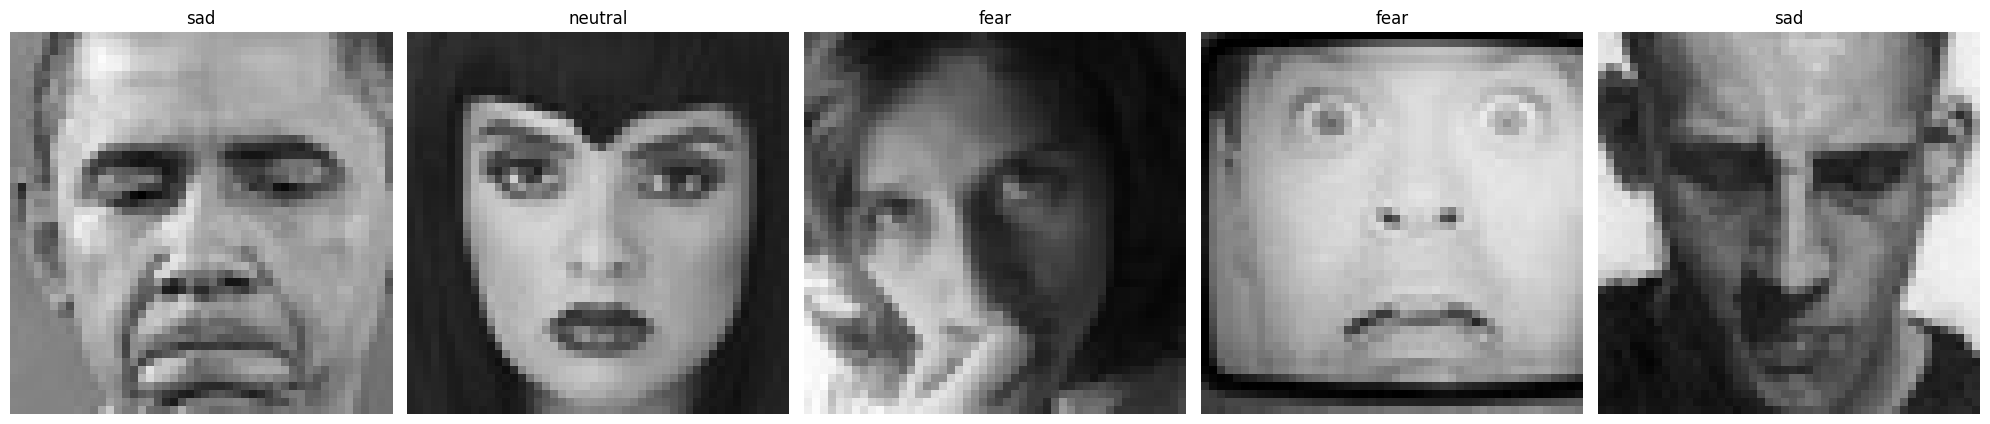

In [10]:
display_random_images(train_data, train_labels)

In [11]:
IMG_SIZE = (48,48)
IMG_SHAPE = IMG_SIZE + (3,)
#base_model = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=IMG_SHAPE, weights='imagenet')

emotion_model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding = 3,input_shape=(48, 48, 3), data_format="channels_last"),
        tfl.Conv2D(40,5,1),
        tfl.BatchNormalization(axis = 3),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(7, activation = "softmax")
    ])




In [12]:
emotion_model.build((16, 48, 48, 3))
emotion_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 54, 54, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 40)        3040      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 40)       160       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 50, 50, 40)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 40)       0         
 )                                                               
                                                      

In [13]:
emotion_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [14]:
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 54, 54, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 40)        3040      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 40)       160       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 50, 50, 40)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 40)       0         
 )                                                               
                                                      

In [15]:
history = emotion_model.fit(np.array(train_data), np.array(train_labels_encoded), epochs=30, batch_size=16)

Epoch 1/30
3552/3552 [==============================] - 47s 9ms/step - loss: 1.7515 - accuracy: 0.4247
Epoch 2/30
3552/3552 [==============================] - 34s 10ms/step - loss: 1.3210 - accuracy: 0.5139
Epoch 3/30
3552/3552 [==============================] - 34s 9ms/step - loss: 1.2003 - accuracy: 0.5617
Epoch 4/30
3552/3552 [==============================] - 33s 9ms/step - loss: 1.0805 - accuracy: 0.6098
Epoch 5/30
3552/3552 [==============================] - 34s 10ms/step - loss: 0.9738 - accuracy: 0.6467
Epoch 6/30
3552/3552 [==============================] - 29s 8ms/step - loss: 0.8818 - accuracy: 0.6851
Epoch 7/30
3552/3552 [==============================] - 32s 9ms/step - loss: 0.8036 - accuracy: 0.7137
Epoch 8/30
3552/3552 [==============================] - 30s 8ms/step - loss: 0.7364 - accuracy: 0.7412
Epoch 9/30
3552/3552 [==============================] - 31s 9ms/step - loss: 0.6840 - accuracy: 0.7585
Epoch 10/30
3552/3552 [==============================] - 33s 9ms/step -

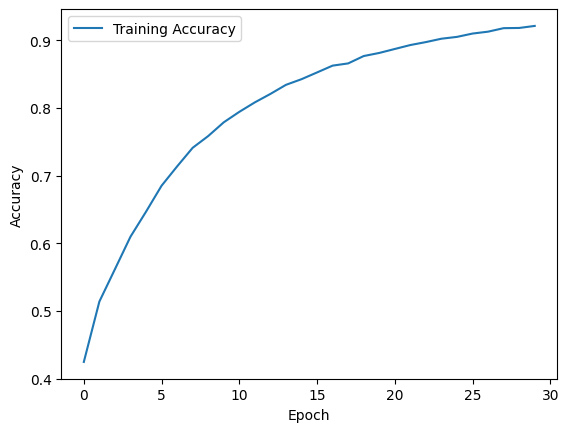

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

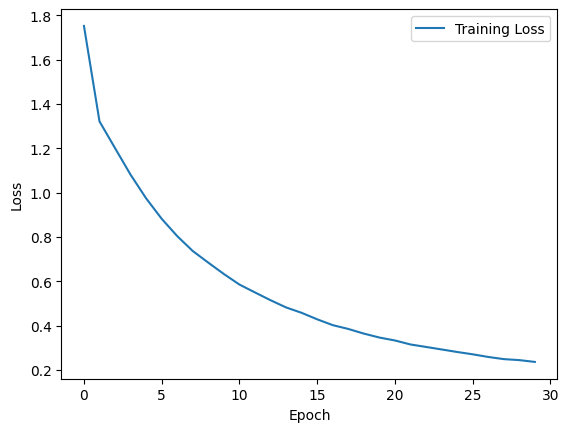

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_labels_encoded = label_encoder.fit_transform(test_labels)
loss, accuracy = emotion_model.evaluate(np.array(test_data), np.array(test_labels_encoded), batch_size=16, verbose=1)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

ValueError: in user code:

    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Tanma\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


In [ ]:
print("Test data shape:", np.array(test_data).shape)
print("Test labels shape:", np.array(test_labels_encoded).shape)

In [ ]:
emotion_model.save('emotion_model.h5')